<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Cai_Nowicki_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-18 23:14:50--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.22.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.22.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.7MB/s    in 4.6s    

2019-09-18 23:14:55 (42.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

I need 
- product_name
- product_id
- order_id

I need to match product IDs and product names from the "products" dataframe, and look for how often those product IDs are ordered in the "order_products__prior" and "order_products__train" dataframes.

In [0]:
import pandas as pd

In [7]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
order_products = ( pd.concat(
                  [pd.read_csv('order_products__prior.csv'),
                  pd.read_csv('order_products__train.csv')])
                 )
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
merged = ( pd.merge(
    products[['product_id', 'product_name']], 
    order_products[['order_id', 'product_id']])
         )

In [10]:
merged.sample(10)

,product_id,product_name,order_id
15001667,22963,Organic Roasted Turkey Breast,3154759
3634300,5922,"Honest Face, Hand, & Baby Wipes",3302380
2768770,5025,Green Onions,1324943
4870862,8174,Organic Navel Orange,790101
9567643,15383,Garlic Alfredo Sauce,1173357
10951771,17794,Carrots,1956081
23552305,34898,Low Moisture Part Skim Mozzarella String Cheese,1057150
12974708,20955,Cereal,3098328
20829474,30529,Stage 2 Pear Pumpkin Baby Food,1940708
1363440,2581,Lavender Floral & Mint Natural Dish Liquid,536283


Now I need a subset of orders containing just my top ten most popular ordered foods. 
1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

In [0]:
top10 = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 
         'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
         'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']
condition = merged['product_name'].isin(top10)
subset = merged[condition]

In [12]:
subset.shape

(2418314, 3)

In [13]:
merged.shape

#Good, subset should be smaller

(33819106, 3)

In [0]:
def how_many(name):
  name = [name]
  condition = subset['product_name'].isin(name) == True
  counted_set = subset[condition]
  count = len(counted_set)
  name = name[0]
  return print(name, 'was ordered', count, 'times.', '\n')

In [15]:
print('Banana')
how_many('Banana')
print('Bag of Organic Bananas')
how_many('Bag of Organic Bananas')
print('Organic Strawberries')
how_many('Organic Strawberries')
print('Organic Baby Spinach')
how_many('Organic Baby Spinach')
print('Organic Hass Avocado')
how_many('Organic Hass Avocado')
print('Organic Avocado')
how_many('Organic Avocado')
print('Large Lemon')
how_many('Large Lemon')
print('Strawberries')
how_many('Strawberries')
print('Limes')
how_many('Limes')
print('Organic Whole Milk')
how_many('Organic Whole Milk')

Banana
Banana was ordered 491291 times. 

Bag of Organic Bananas
Bag of Organic Bananas was ordered 394930 times. 

Organic Strawberries
Organic Strawberries was ordered 275577 times. 

Organic Baby Spinach
Organic Baby Spinach was ordered 251705 times. 

Organic Hass Avocado
Organic Hass Avocado was ordered 220877 times. 

Organic Avocado
Organic Avocado was ordered 184224 times. 

Large Lemon
Large Lemon was ordered 160792 times. 

Strawberries
Strawberries was ordered 149445 times. 

Limes
Limes was ordered 146660 times. 

Organic Whole Milk
Organic Whole Milk was ordered 142813 times. 



## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

### Replicate Lesson Code

In [16]:
import urllib.request
url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'
file_name = 'instacart_online_grocery_shopping_2017_05_01.tar.gz'
urllib.request.urlretrieve(url, file_name)

('instacart_online_grocery_shopping_2017_05_01.tar.gz',
 <http.client.HTTPMessage at 0x7efcedb14940>)

In [0]:
import tarfile
tar = tarfile.open(file_name, 'r:gz')
tar.extractall()
tar.close()

In [18]:
import os
print(os.getcwd())

/content/instacart_2017_05_01


In [19]:
import glob
glob.glob('/content/instacart_2017_05_01/*.csv')

['/content/instacart_2017_05_01/products.csv',
 '/content/instacart_2017_05_01/order_products__train.csv',
 '/content/instacart_2017_05_01/departments.csv',
 '/content/instacart_2017_05_01/orders.csv',
 '/content/instacart_2017_05_01/aisles.csv',
 '/content/instacart_2017_05_01/order_products__prior.csv']

In [0]:
from IPython.display import display, Image

In [21]:
url = url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
import pandas as pd

In [23]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [24]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head=()

In [26]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
orders = pd.read_csv('orders.csv')

In [0]:
products = pd.read_csv('products.csv')

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])

In [0]:
assert len(order_products__prior) + len(order_products__train) == len(order_products)

In [31]:
order_products.groupby('order_id')['product_id'].count().mean()

10.10707325550502

In [0]:
grouped_orders = order_products.groupby('order_id')


In [33]:
grouped_orders.get_group(2539329)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [34]:
order_products[order_products['order_id'] == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


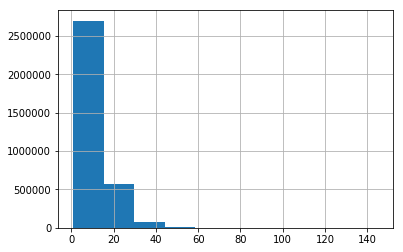

In [35]:
grouped_orders['product_id'].count().hist()

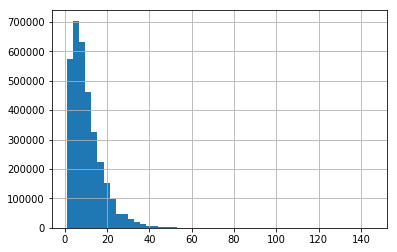

In [36]:
grouped_orders['product_id'].count().hist(bins=50)

In [37]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
subset = orders[condition][columns]

In [39]:
subset.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


In [40]:
columns = ['order_id', 'product_id', 'add_to_cart_order']
merged = pd.merge(subset, order_products[columns])
merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [41]:
final = pd.merge(merged, products[['product_id', 'product_name']])
columns = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 
           'add_to_cart_order', 'product_id', 'product_name']
final = final[columns]
final.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky


In [42]:
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
columns = [col.replace('_', ' ') for col in final.columns]
final.columns = columns

In [44]:
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
  [[np.nan, 2],
  [16, 11],
  [3, 1]],
  index=['John Smith', 'Jane Doe', 'Mary Johnson'],
  columns=['treatmenta', 'treatmentb'])
    
table2 = table1.T

In [46]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [47]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [48]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [49]:
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [51]:
tidy.columns = ['name', 'trt', 'result']
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


###Table 2 --> Tidy

In [52]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
table2 = table2.reset_index()

In [57]:
tidy2 = table2.melt(id_vars='index')
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [58]:
tidy2.columns = ['treatment', 'name', 'result']
tidy2

,treatment,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [59]:
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [60]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


###Tidy2 ---> Table2

In [61]:
tidy2.pivot_table(index='treatment', columns='name', values='result')

name,Jane Doe,John Smith,Mary Johnson
treatment,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


### Seaborn 
Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [64]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [67]:
pivot = flights.pivot_table(index='year', columns='month', values='passengers')
pivot.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


In [68]:
pivot.loc[1949, 'January']

112

In [69]:
pivot.loc[1960, 'December']

432

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####